Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

Do not edit or insert code into the test cells as all you insert will be overwritten by the automated testing code.

---

**Question 6**: The Maxwell (or Maxwell-Boltzmann) distribution gives the distribution of speeds of molecules in thermal equilibrium as given by statistical mechanics. The distribution function is given as $$p(v)=\sqrt{\frac{2}{\pi}}\,\frac{v^{2}\,\exp\left(-\frac{v^{2}}{2\,a^{2}}\right)}{a^{3}}$$ with speed $v$ and $$a=\sqrt{\frac{k\,T}{m}}$$ and $k$ the Boltzmann constant, $T$ the temperature and $m$ the atomic mass of the molecules. 

Consider the SciPy function `scipy.stats.maxwell` which permits to draw random speed values from a Maxwell distribution. Given a value for the parameter $a$, the speed distribution can be used as `sample = maxwell.rvs(scale=a, size=1000)` to obtain a thousand random speeds from the Maxwell distribution with the correct temperature and molecule mass. Use the `scipy.constants` library to define the molecule mass in atomic mass units in kg and obtain the correct Boltzmann constant. Use SI units throughout.

**Task**: **(a)** Write a function `samples(T1, T2, mass)` which draws two samples of 1000 random speed values each from the Maxwell distribution with temperatures $T_{1}$ and $T_{2}$ and atomic mass in units of kg as input. 

The first sample should represent Helium gas molecule speeds at room temperature ($T_{1}=300\,$K), the second cold Helium liquid at $T_{2}=4\,$K. Use the `scipy.constants` library to define the Helium molecule mass at 4 atomic mass units in kg.

**(b)** Write a function `doCollision(ncoll, sample1, sample2)` which takes the number of simulated collisions as input as well as the two prepared samples. For each collision simulation create a random pair from members of both samples and determine the absolute **energy** difference. Add half the energy difference to the slower molecule and subtract half the energy difference from the faster molecule so that in the end both have the same energy. Then obtain the speed of the individual molecules from their energy and change it in the speed sample array accordingly for both and collide the next pair.

Simulate $10^{4}$ collisions between the hot and cold Helium. Merge the distributions into one and print the final temperature value, calculated from the final mean value. The mean value of the Maxwell distribution in the notation from above is given as $$\mu=2\,a\,\sqrt{\frac{2}{\pi}}.$$ Plot the merged speed distribution histogram (20 bins are recommended) with appropriate axes labels and title.

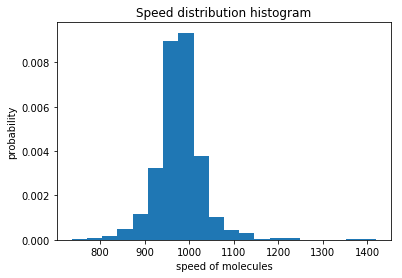

The final temperature is 180.5868135506705


In [1]:
# YOUR CODE HERE
from scipy.stats import maxwell
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
import scipy.constants as pc

def a(T, m):
    '''This calcuates a'''
    return np.sqrt(pc.k*T/m)

def samples(T1, T2, mass):
    '''This draws two samples with 1000 random speed'''
    a1 = a(T1, mass)
    a2 = a(T2, mass)
    sample1 = maxwell.rvs(scale=a1, size=1000)
    sample2 = maxwell.rvs(scale=a2, size=1000)
    return sample1, sample2

def doCollision(ncoll, sample11, sample21):
    '''This returns a sample after they've collided'''
    sample12 = np.array(sample11)
    sample22 = np.array(sample21)
    for i in range(ncoll):
        rn1 = random.randint(0, len(sample11)-1)
        rn2 = random.randint(0, len(sample21)-1)
        s1 = 2*pc.u*sample12[rn1]**2
        s2 = 2*pc.u*sample22[rn2]**2
        x = 0.5*(s1+s2)
        sample12[rn1] = np.sqrt(x/(2*(pc.u)))
        sample22[rn2] = np.sqrt(x/(2*(pc.u)))
    return np.concatenate((sample12, sample22))

def main():
    '''This is the main function that plots the histogram'''
    m = 4.0*pc.u
    wh, ch = samples(300, 4, m)
    combined = doCollision(10000, wh, ch)
    plt.hist(combined, density=True, bins=20)
    plt.xlabel('speed of molecules')
    plt.ylabel('probability')
    plt.title('Speed distribution histogram')
    plt.show()
    T = np.mean(combined)**2*4*pc.u*np.pi/(8*pc.k)
    print('The final temperature is '+ str(T))

main()


In [2]:
# Test cell
import scipy.constants as pc
m = 4.0*pc.u
wh, ch = samples(300, 4, m)
assert (len(wh)==1000), 'wrong sample size'

In [3]:
# Test cell
assert (np.mean(wh)>1200.0 and np.mean(wh)<1300.0), 'wrong room temperature helium distribution'
assert (np.mean(ch)>130.0 and np.mean(ch)<150.0), 'wrong cold temperature helium distribution'

### Tests 3 marks; Style 1 mark; Plot - 2 marks